In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [4]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [5]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
tau1,2.95906,9.304097,8.971707,0.716415,3.134112,6.999209,6.710166,6.953512,4.689852,9.841496,...,5.783299,0.998988,3.114442,5.754191,2.042954,2.930406,3.392299,2.364034,9.631511,6.530527
tau2,3.079885,4.902524,8.848428,7.6696,7.608772,9.109247,3.765204,1.379125,4.007747,1.413822,...,4.726614,9.924916,4.781072,3.032743,8.514335,9.487627,1.274827,2.84203,3.994398,6.78179
tau3,8.381025,3.047541,3.046479,4.486641,4.943759,3.784066,6.929314,5.7194,1.478573,9.769856,...,1.340273,8.926563,2.427918,5.084803,8.173809,2.376523,2.954947,8.776391,2.757071,4.349695
tau4,9.780754,1.369357,1.214518,2.340563,9.857573,4.267788,8.818562,7.870307,3.733787,7.641616,...,8.617933,2.885941,7.989509,4.633624,5.466635,6.187797,6.894759,1.008906,7.821347,8.673138
p1,3.763085,5.067812,3.405158,3.963791,3.525811,4.429669,2.397419,3.224495,4.0413,4.727595,...,4.587533,3.660232,2.673156,5.19925,3.783797,3.343416,4.349512,4.299976,2.514755,3.492807
p2,-0.782604,-1.940058,-1.207456,-1.027473,-1.125531,-1.857139,-0.61459,-0.748998,-1.410344,-1.991363,...,-1.950574,-1.103521,-0.918191,-1.71703,-1.639912,-0.658054,-1.663661,-1.380719,-0.96633,-1.390285
p3,-1.257395,-1.872742,-1.27721,-1.938944,-1.845975,-0.670397,-1.208826,-1.186517,-1.238204,-0.857637,...,-1.594137,-1.105641,-0.652736,-1.713212,-0.662469,-1.449106,-0.952437,-0.943884,-0.649915,-1.532193
p4,-1.723086,-1.255012,-0.920492,-0.997374,-0.554305,-1.902133,-0.574004,-1.28898,-1.392751,-1.878594,...,-1.042822,-1.45107,-1.102228,-1.769009,-1.481417,-1.236256,-1.733414,-1.975373,-0.89851,-0.570329
g1,0.650456,0.413441,0.163041,0.446209,0.79711,0.261793,0.17789,0.371385,0.269708,0.376356,...,0.445853,0.71766,0.86795,0.157284,0.154129,0.601709,0.502079,0.487838,0.365246,0.073056
g2,0.859578,0.862414,0.766689,0.976744,0.45545,0.07793,0.397977,0.633204,0.250364,0.544415,...,0.64568,0.954919,0.888858,0.975921,0.944486,0.779642,0.567242,0.986505,0.587558,0.505441


In [8]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [9]:
df.stabf.value_counts

<bound method IndexOpsMixin.value_counts of 0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object>

In [10]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

# Data visualization

<AxesSubplot:>

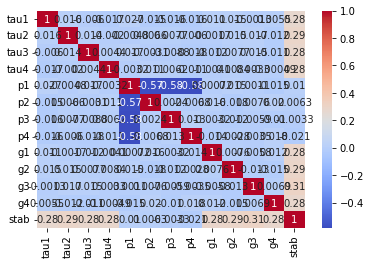

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

sns.set_style('whitegrid')
sns.pairplot(df,hue='stabf')

In [ ]:
There still exist imballance in the trainset adta


# Split data into target and features

In [22]:
features_vals = df.drop(columns=['stab', 'stabf'])
target_vals = df['stabf']


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_vals, target_vals, test_size=0.2, random_state=1)

In [16]:
x_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162


In [17]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

# There still exist imballance in the trainset adta

In [18]:
import imblearn 
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state= 1) 
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [20]:
x_train_balanced.shape

(10184, 12)

In [21]:
y_balanced.shape

(10184,)

 ## Features Scaling

# Applying Standard Scaler on the training set

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
scaler = StandardScaler()
x_train_scaledvals = pd.DataFrame(scaler.fit_transform(x_train_balanced), columns=x_train_balanced.columns)

In [30]:
x_train_scaledvals.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.431352,-0.906078,0.709472,1.601487,-0.299634,0.070986,1.327370,-0.875325,0.227072,0.416592,0.675795,0.567770
1,0.007043,0.151748,1.089400,-1.545174,0.636265,-0.061013,-1.541948,0.492481,-0.241282,-1.540004,1.547891,-1.427980
2,-1.371213,1.340884,-0.429412,1.225073,-0.185676,0.510814,0.700214,-0.885831,1.504487,1.562377,-1.009660,0.568027
3,0.876060,0.585001,1.350743,-1.052290,-0.835039,-0.774873,1.560992,0.669318,-0.927397,1.470053,1.728175,0.344110
4,0.724152,-1.338448,0.375461,0.981443,-1.658064,0.787290,1.458851,0.649251,1.790768,0.783310,1.246050,-1.292976


# Ecoding the target variable

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [32]:
print(y_train)

[1 1 1 ... 1 1 0]


# Measuring Classiﬁcation Performance
# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression 
log_reg   =   LogisticRegression() 
log_reg.fit(x_train_scaledvals, y_balanced) 

LogisticRegression()

# Cross-validation and accuracy

In [36]:
from sklearn.model_selection import cross_val_score 
scores   =   cross_val_score(log_reg,   x_train_scaledvals,   y_balanced,   cv= 5 ,   scoring= 'f1_macro' ) 

In [37]:
scores

array([0.80215317, 0.81786784, 0.80510386, 0.83356275, 0.80421639])

# K-Fold Cross Validation

In [38]:
from sklearn.model_selection import KFold 
kf   =   KFold(n_splits= 5 ) 
kf.split( x_train_scaledvals)  
f1_scores   =   [] 

# run for every split

In [40]:
for train_index, test_index in kf.split(x_train_scaledvals): 
    x_train,   x_test   =   x_train_scaledvals.iloc[train_index], x_train_scaledvals.iloc[test_index] 
    y_train,   y_test   =   y_balanced[train_index], y_balanced[test_index] 
    model   =   LogisticRegression().fit(x_train,   y_train) 

# Stratiﬁed K-Fold Cross Validation